In [1]:
import sqlite3
from natasha import (
    Segmenter,
    MorphVocab,
    NewsEmbedding,
    NewsNERTagger,
    Doc
)

segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
ner_tagger = NewsNERTagger(emb)

In [2]:
conn = sqlite3.connect('oleg.db')
cur = conn.cursor()

Вынем из сообщений именованные сущности.

In [3]:
cur.execute('''
select text 
from texts''')
lines = cur.fetchall()

In [4]:
text = ''
for line in lines:
    text = text + line[0] + ' '

In [5]:
doc = Doc(text)

In [6]:
doc.segment(segmenter)
doc.tag_ner(ner_tagger)
with open('named_e.txt', 'w') as f:
    for span in doc.spans:
        span.normalize(morph_vocab)
        f.write(span.normal)
        f.write('\n')

Natasha не была придумана для текстов с отсутствием пунктуации и непостоянной капитализацией, поэтому помимо настоящих именованных сущностей она вынимает вещи типа "Макса Нет Никакого Макса Четвертым". Я вручную просмотрела всё выбранное и оставила нужное. Облако строится по чистым данным.

## Облако

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import random

In [8]:
with open('named_e_clean.txt', 'r') as f:
    clean = f.read()

In [9]:
clean = clean.replace(' ', '_').split()

Изначально в документе все слова шли по алфавиту, но wordcloud почему-то с этим не справлялся, поэтому здесь я их перемешиваю.

In [10]:
random.shuffle(clean)

In [11]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(281, 48%%, %d%%)" % random.randint(30, 70)

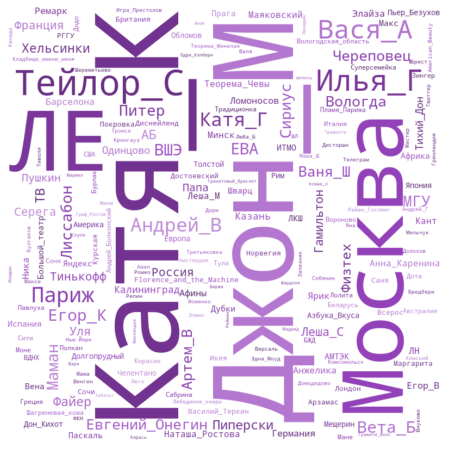

In [12]:
text = ' '.join(clean)

wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off") 
plt.show()